<a href="https://colab.research.google.com/github/Michael-David-Lam/NLP-Final-Project/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clean uninstall
!pip uninstall -y numpy gensim tensorflow keras-crf tensorflow-addons torch torchtext scipy

# Reinstall dependencies in proper order
!pip install numpy==1.24.3
!pip install scipy==1.10.1
!pip install gensim==4.3.1
!pip install tensorflow==2.12.0
!pip install tensorflow-addons==0.20.0
!pip install keras-crf
!pip install torch==2.0.1 torchtext==0.15.2
!pip install datasets

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: gensim 4.3.1
Uninstalling gensim-4.3.1:
  Successfully uninstalled gensim-4.3.1
Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Found existing installation: keras-crf 0.3.0
Uninstalling keras-crf-0.3.0:
  Successfully uninstalled keras-crf-0.3.0
Found existing installation: tensorflow-addons 0.20.0
Uninstalling tensorflow-addons-0.20.0:
  Successfully uninstalled tensorflow-addons-0.20.0
Found existing installation: torch 2.0.1
Uninstalling torch-2.0.1:
  Successfully uninstalled torch-2.0.1
Found existing installation: torchtext 0.15.2
Uninstalling torchtext-0.15.2:
  Successfully uninstalled torchtext-0.15.2
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 17.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires torch>=1.11.0, which is not installed.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
fastai 2.7.19 requires torch<2.7,>=1.10, which is not installed.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
cvxpy 1.6.5 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
flax 0.10.6 requires jax>=0.5.1, but you have jax 0.4.30 which is incompatible.
orbax-checkpoint 0

  Using cached tensorflow_addons-0.20.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached tensorflow_addons-0.20.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (591 kB)
  Using cached keras_crf-0.3.0-py3-none-any.whl.metadata (4.3 kB)
Using cached keras_crf-0.3.0-py3-none-any.whl (8.3 kB)
  Using cached torch-2.0.1-cp311-cp311-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached torchtext-0.15.2-cp311-cp311-manylinux1_x86_64.whl.metadata (7.4 kB)
Using cached torch-2.0.1-cp311-cp311-manylinux1_x86_64.whl (619.9 MB)
Using cached torchtext-0.15.2-cp311-cp311-manylinux1_x86_64.whl (2.0 MB)
ERROR: Operation cancelled by user
^C
^C


In [ ]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from datasets import load_dataset



In [ ]:
!pip install seqeval


In [ ]:
dataset = load_dataset("surrey-nlp/PLOD-CW-25")

print(dataset)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 250
    })
    validation: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 150
    })
})


In [ ]:
df_train = pd.DataFrame(dataset["train"])
df_val = pd.DataFrame(dataset["validation"])
df_test = pd.DataFrame(dataset["test"])


#Token Length Distribution (Per Sentence)

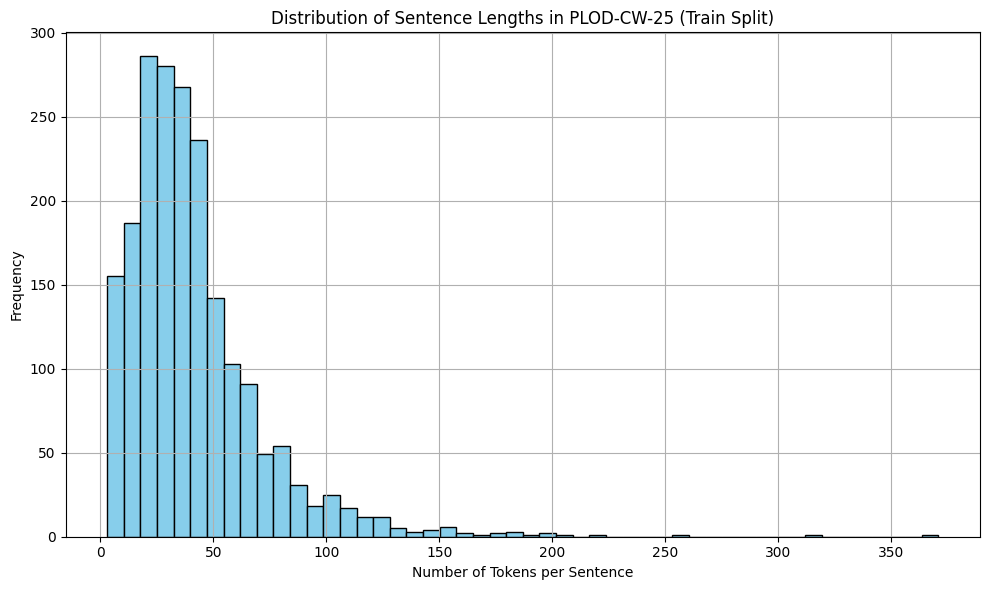

In [ ]:
import matplotlib.pyplot as plt

# Sentence length (number of tokens per sample)
token_lengths = [len(tokens) for tokens in df_train["tokens"]]

plt.figure(figsize=(10, 6))
plt.hist(token_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Sentence Lengths in PLOD-CW-25 (Train Split)")
plt.xlabel("Number of Tokens per Sentence")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis of this Distribution

In [ ]:

# Calculate basic statistics
mean_len = np.mean(all_lengths)
median_len = np.median(all_lengths)
std_len = np.std(all_lengths)
percentile_90 = np.percentile(all_lengths, 90)

print(f"Mean Token Length: {mean_len}")
print(f"Median Token Length: {median_len}")
print(f"Standard Deviation: {std_len}")
print(f"90th Percentile: {percentile_90}")

Mean Token Length: 41.17041666666667
Median Token Length: 35.0
Standard Deviation: 29.88717185504603
90th Percentile: 76.0


In [ ]:
#To combine train,test,split for vectorisation to build a rich embedding space

import ast

def safe_parse(col):
    return [ast.literal_eval(row) if isinstance(row, str) else row for row in col]

train_tokens = safe_parse(df_train["tokens"])
val_tokens = safe_parse(df_val["tokens"])
test_tokens = safe_parse(df_test["tokens"])

all_tokens = train_tokens + val_tokens + test_tokens
print(all_tokens[:2])


[['MRR', ',', 'mortality', 'rate', 'ratio', ';', 'TBI', ',', 'traumatic', 'brain', 'injury', '.'], ['HPC', ',', 'hippocampus', ';', 'mOFC', ',', 'medial', 'OFC', ';', 'OFC', ',', 'orbitofrontal', 'cortex', ';', 'PPI', ',', 'psychophysiological', 'interaction', '.']]


#Abbreviation vs Long-Form Token Distribution


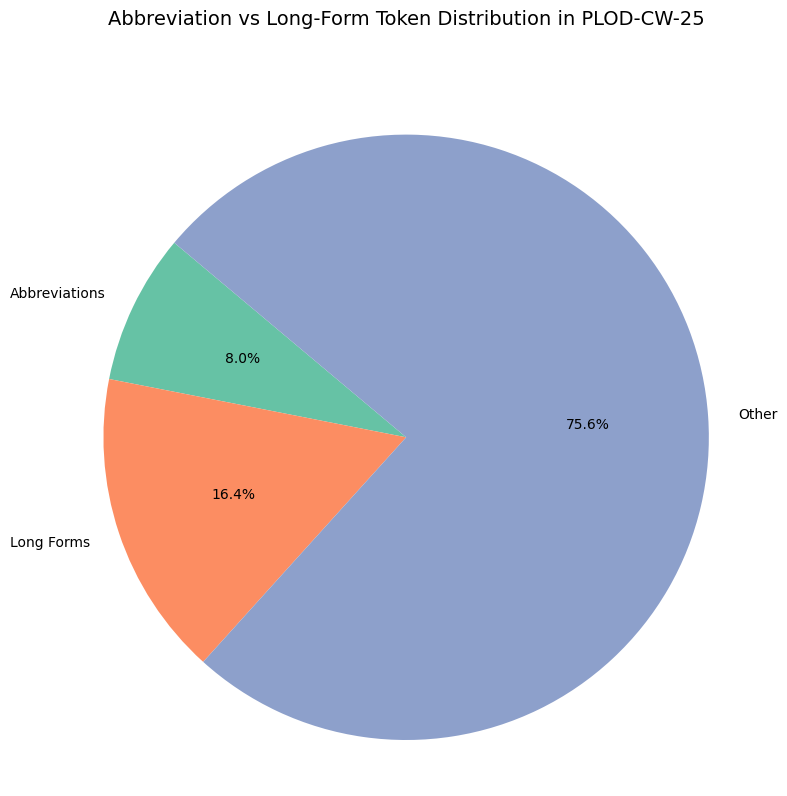

In [ ]:
# Define categories
abbreviation_tags = {"B-AC", "I-AC"}
longform_tags = {"B-LF", "I-LF"}

# Count categories
abbrev_count = sum(1 for tag in all_tags if tag in abbreviation_tags)
longform_count = sum(1 for tag in all_tags if tag in longform_tags)
other_count = sum(1 for tag in all_tags if tag not in abbreviation_tags and tag not in longform_tags)

# Create data for visualization
labels = ["Abbreviations", "Long Forms", "Other"]
sizes = [abbrev_count, longform_count, other_count]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=["#66c2a5", "#fc8d62", "#8da0cb"])
plt.title("Abbreviation vs Long-Form Token Distribution in PLOD-CW-25", fontsize=14, y=1.08)
plt.axis("equal")
plt.tight_layout()
plt.show()

# Most Common Tokens in Dataset

<ipython-input-9-4cd9e2d43a86>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tokens), y=list(freqs), palette="cubehelix")


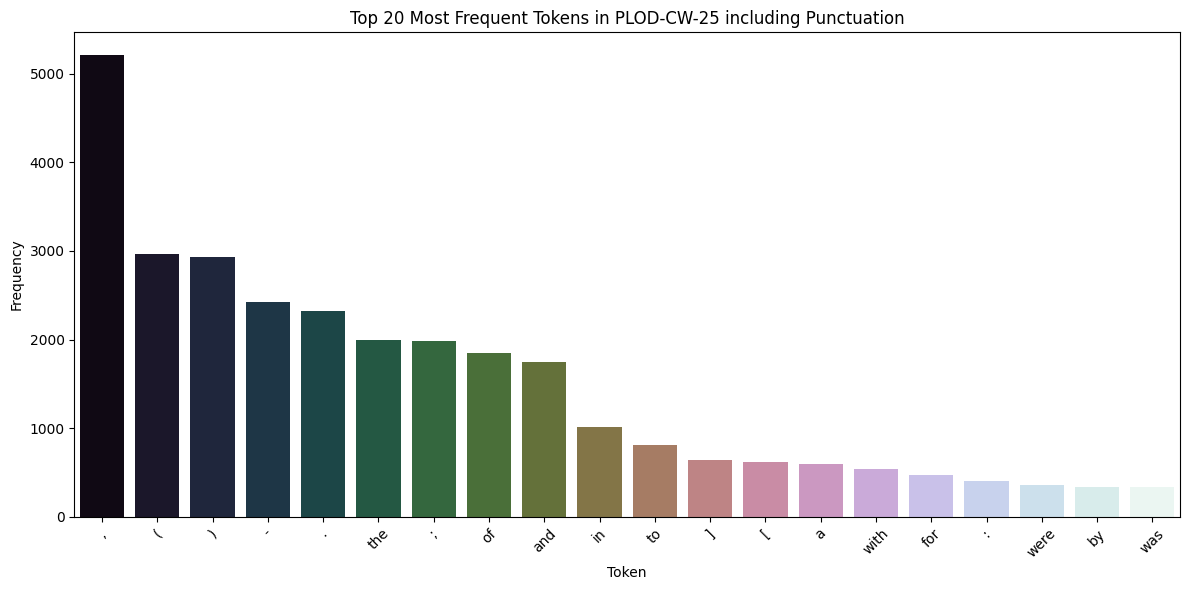

In [ ]:
from itertools import chain

# Flatten and count
all_tokens = list(chain.from_iterable(df_train["tokens"]))
token_freq = Counter(all_tokens).most_common(20)

tokens, freqs = zip(*token_freq)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(tokens), y=list(freqs), palette="cubehelix")
plt.title("Top 20 Most Frequent Tokens in PLOD-CW-25 including Punctuation")
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Most Common Tokens in Dataset, excluding Punctuation




<ipython-input-10-e4be2b28be9e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tokens), y=list(freqs), palette="cubehelix")


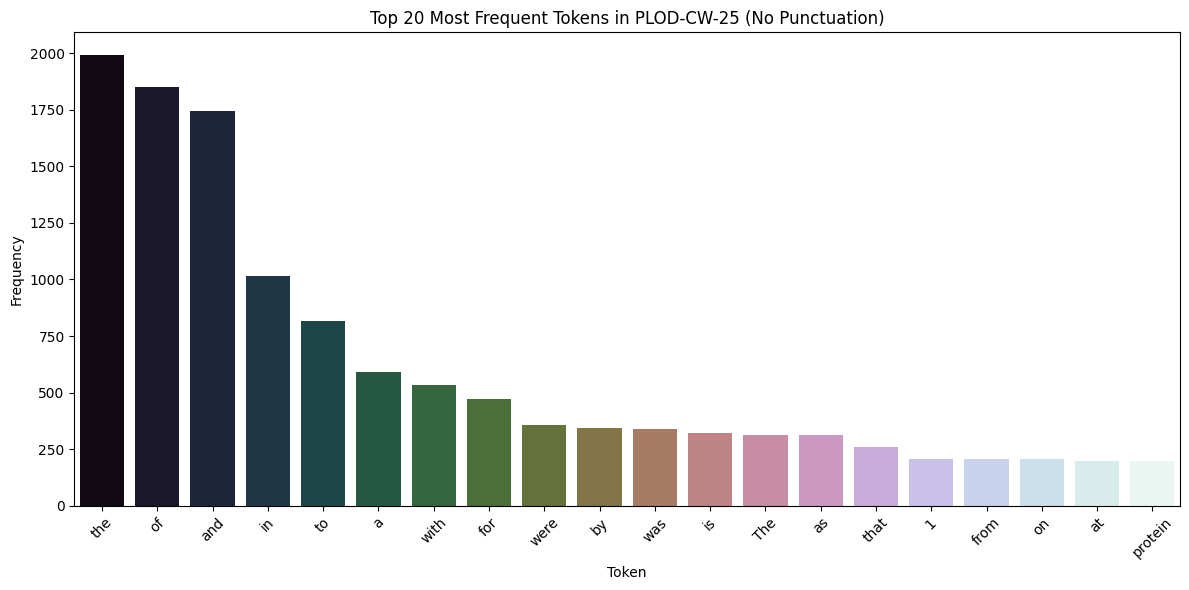

In [ ]:
import string
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Define a set of punctuation characters to remove
punctuation = set(string.punctuation)

# Filter out punctuation tokens
filtered_tokens = [token for token in chain.from_iterable(df_train["tokens"]) if token not in punctuation]

# Count the frequency of tokens (after filtering out punctuation)
token_freq = Counter(filtered_tokens).most_common(20)

# Extract tokens and their frequencies
tokens, freqs = zip(*token_freq)

# Plot the top 20 most frequent tokens (excluding punctuation)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(tokens), y=list(freqs), palette="cubehelix")
plt.title("Top 20 Most Frequent Tokens in PLOD-CW-25 (No Punctuation)")
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Co-occurrence Networks


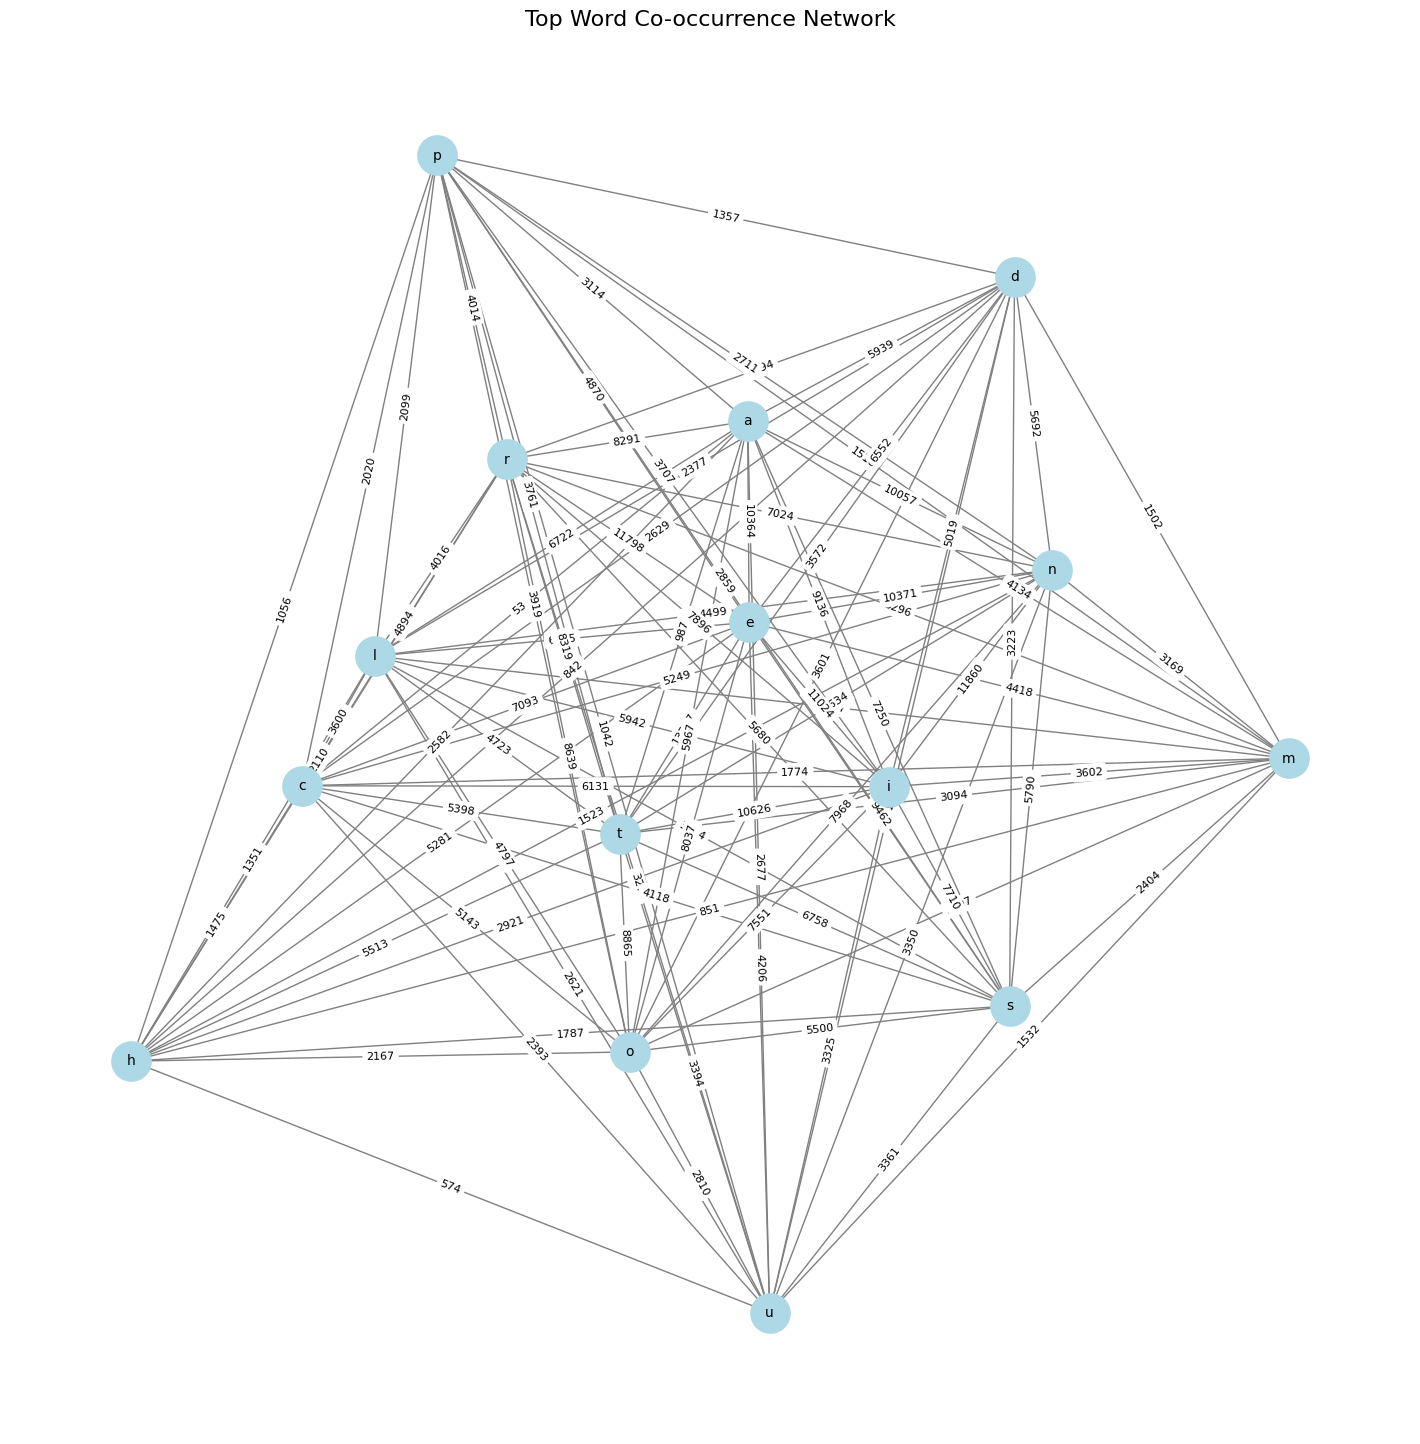

In [ ]:
import networkx as nx
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

# Step 1: Count co-occurrences (pairwise within each sentence)
co_occurrence = Counter()

# Take the punctuation out
#filtered_tokens = [[word for word in sent if len(word) > 1] for sent in all_tokens]

for sentence in all_tokens:
    unique_words = set(sentence)  # Remove duplicates within sentence
    for w1, w2 in combinations(unique_words, 2):
        pair = tuple(sorted((w1, w2)))  # Sort to avoid (w1,w2) ≠ (w2,w1)
        co_occurrence[pair] += 1

# Step 2: Create the graph
G = nx.Graph()
for (w1, w2), weight in co_occurrence.items():
    G.add_edge(w1, w2, weight=weight)

# Step 3: Visualize top N edges (optional, for clarity)
top_N = 50  # Change this to see more or fewer connections
top_edges = sorted(co_occurrence.items(), key=lambda x: x[1], reverse=True)[:top_N]
top_nodes = set([w for pair, _ in top_edges for w in pair])
G_top = G.subgraph(top_nodes)

# Step 4: Draw the graph
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G_top, k=0.5, seed=42)
nx.draw(G_top, pos, with_labels=True, node_size=800, node_color="lightblue", font_size=10, edge_color="gray")
edge_labels = nx.get_edge_attributes(G_top, 'weight')
nx.draw_networkx_edge_labels(G_top, pos, edge_labels=edge_labels, font_size=8)
plt.title("Top Word Co-occurrence Network", fontsize=16)
plt.axis('off')
plt.show()

above isnt really helpful, TODO: fix this to better demonstrate data

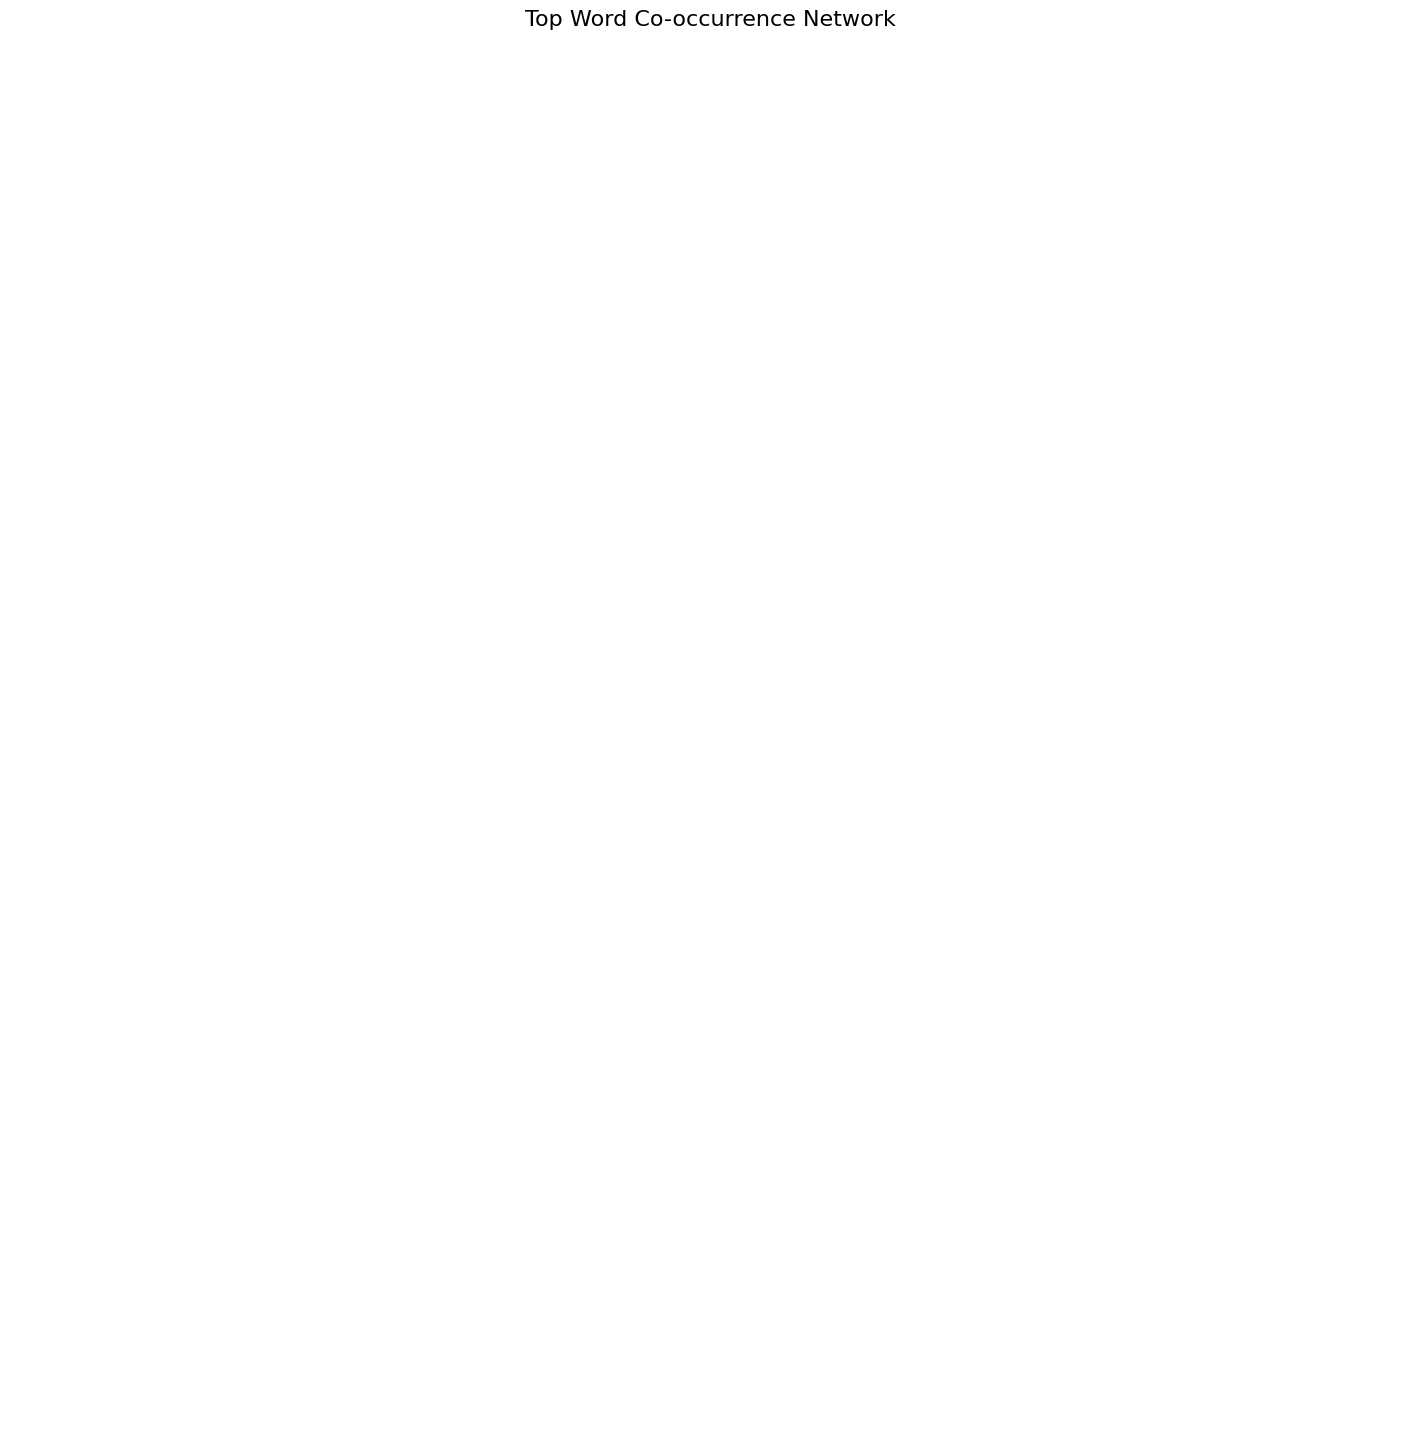

In [ ]:
import networkx as nx
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

# Step 1: Count co-occurrences (pairwise within each sentence)
co_occurrence = Counter()

# Take the punctuation out
filtered_tokens = [[word for word in sent if len(word) > 1] for sent in all_tokens]

for sentence in filtered_tokens:
    unique_words = set(sentence)  # Remove duplicates within sentence
    for w1, w2 in combinations(unique_words, 2):
        pair = tuple(sorted((w1, w2)))  # Sort to avoid (w1,w2) ≠ (w2,w1)
        co_occurrence[pair] += 1

# Step 2: Create the graph
G = nx.Graph()
for (w1, w2), weight in co_occurrence.items():
    G.add_edge(w1, w2, weight=weight)

# Step 3: Visualize top N edges (optional, for clarity)
top_N = 50  # Change this to see more or fewer connections
top_edges = sorted(co_occurrence.items(), key=lambda x: x[1], reverse=True)[:top_N]
top_nodes = set([w for pair, _ in top_edges for w in pair])
G_top = G.subgraph(top_nodes)

# Step 4: Draw the graph
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G_top, k=0.5, seed=42)
nx.draw(G_top, pos, with_labels=True, node_size=800, node_color="lightblue", font_size=10, edge_color="gray")
edge_labels = nx.get_edge_attributes(G_top, 'weight')
nx.draw_networkx_edge_labels(G_top, pos, edge_labels=edge_labels, font_size=8)
plt.title("Top Word Co-occurrence Network", fontsize=16)
plt.axis('off')
plt.show()

In [ ]:
#List of Parameters (Just using Lab as reference)
num_features = 300
min_word_count = 1
num_workers = 2
window_size = 3
subsampling = 1e-3

In [ ]:
w2v_model = Word2Vec(
    sentences=all_tokens,
    vector_size=num_features,
    window=window_size,
    min_count=min_word_count,
    workers=num_workers,
    sample=subsampling
)

Preparation of data (Creating vocab + embeding matrix from model itself)

In [ ]:
from gensim.models import KeyedVectors
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

vocab = w2v_model.wv.index_to_key
word_index = {word: idx + 1 for idx, word in enumerate(vocab)}

embedding_dim = w2v_model.vector_size
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_matrix[i] = w2v_model.wv[word]


In [ ]:
all_lengths = [len(seq) for seq in train_tokens + val_tokens + test_tokens]

print(max(all_lengths))
print(np.mean(all_lengths))
print(np.percentile(all_lengths, 90))
#likelihood to chose 76 to get the best balance of computational power + covers 90% of sequence

371
41.17041666666667
76.0


In [ ]:
# Encode as Bi-LSTM requires numbers to process
from tensorflow.keras.preprocessing.sequence import pad_sequences

def encode_sentences(token_lists, word_index, max_len):
    sequences = [[word_index.get(token, 0) for token in tokens] for tokens in token_lists]
    return pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")

#using 90th percentile first
max_len = 76

X_train = encode_sentences(train_tokens, word_index, max_len)
X_val = encode_sentences(val_tokens, word_index, max_len)
X_test = encode_sentences(test_tokens, word_index, max_len)

In [ ]:
from sklearn.preprocessing import LabelEncoder

all_tags = df_train["ner_tags"].tolist() + df_val["ner_tags"].tolist() + df_test["ner_tags"].tolist()

tag_encoder = LabelEncoder()
tag_encoder.fit([tag for seq in all_tags for tag in seq])
num_classes = len(tag_encoder.classes_)

def encode_tags(tag_lists, max_len):
    encoded = [tag_encoder.transform(tags) for tags in tag_lists]
    padded = pad_sequences(encoded, maxlen=max_len, padding="post", truncating="post", value=-1)  # -1 for masking
    return padded

y_train = encode_tags(df_train["ner_tags"].tolist(), max_len)
y_val = encode_tags(df_val["ner_tags"].tolist(), max_len)
y_test = encode_tags(df_test["ner_tags"].tolist(), max_len)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, TimeDistributed, Dense, Masking
from tensorflow.keras.utils import to_categorical

input = Input(shape=(max_len,))
model = Embedding(input_dim=embedding_matrix.shape[0],
                  output_dim=embedding_matrix.shape[1],
                  weights=[embedding_matrix],
                  input_length=max_len,
                  mask_zero=True,
                  trainable=True)(input)
model = Bidirectional(LSTM(units=128, return_sequences=True))(model)
model = Dense(num_classes, activation="softmax")(model)

model = Model(input, model)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 76)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 76, 300)           42000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 76, 256)          439296    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 76, 4)             1028      
                                                                 
Total params: 482,324
Trainable params: 482,324
Non-trainable params: 0
_________________________________________________________________


#NER Tag Distribution Bar Graphs SPLIT
Lots of trial and error to get compatible strings to make graph. TODO: clean up code. Unsure if split data is necessary or if the pie chart is enough!

In [ ]:
from sklearn.preprocessing import LabelEncoder
from itertools import chain

# Combine all tags from train, validation, and test splits
all_tags = df_train["ner_tags"].tolist() + df_val["ner_tags"].tolist() + df_test["ner_tags"].tolist()
flat_tags = list(chain.from_iterable(all_tags))

# Fit the LabelEncoder to the full list of tags
tag_encoder = LabelEncoder()
tag_encoder.fit(flat_tags)  # Now the encoder knows all the labels

# Check the classes the encoder has learned
print(tag_encoder.classes_)


['B-AC' 'B-LF' 'I-LF' 'O']


In [ ]:
# Check if there are any unseen tags in the validation and test sets
unique_train_tags = set(chain.from_iterable(df_train["ner_tags"].tolist()))
unique_val_tags = set(chain.from_iterable(df_val["ner_tags"].tolist()))
unique_test_tags = set(chain.from_iterable(df_test["ner_tags"].tolist()))

# Compare tags across all splits
print("Train Tags:", unique_train_tags)
print("Validation Tags:", unique_val_tags)
print("Test Tags:", unique_test_tags)

# Check for any tags not in the training set
print("Unseen tags in validation set:", unique_val_tags - unique_train_tags)
print("Unseen tags in test set:", unique_test_tags - unique_train_tags)


Train Tags: {'B-AC', 'I-LF', 'B-LF', 'O'}
Validation Tags: {'B-AC', 'I-LF', 'B-LF', 'O'}
Test Tags: {'B-AC', 'I-LF', 'B-LF', 'O'}
Unseen tags in validation set: set()
Unseen tags in test set: set()


In [ ]:
from itertools import chain

# Flatten tags across all splits (train, validation, test)
flat_train_tags = list(chain.from_iterable(df_train["ner_tags"].tolist()))
flat_val_tags = list(chain.from_iterable(df_val["ner_tags"].tolist()))
flat_test_tags = list(chain.from_iterable(df_test["ner_tags"].tolist()))

# Check the flattened tags
print(f"Train tags length: {len(flat_train_tags)}")
print(f"Validation tags length: {len(flat_val_tags)}")
print(f"Test tags length: {len(flat_test_tags)}")

Train tags length: 82548
Validation tags length: 6004
Test tags length: 10257


<ipython-input-54-19891834982a>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="viridis")


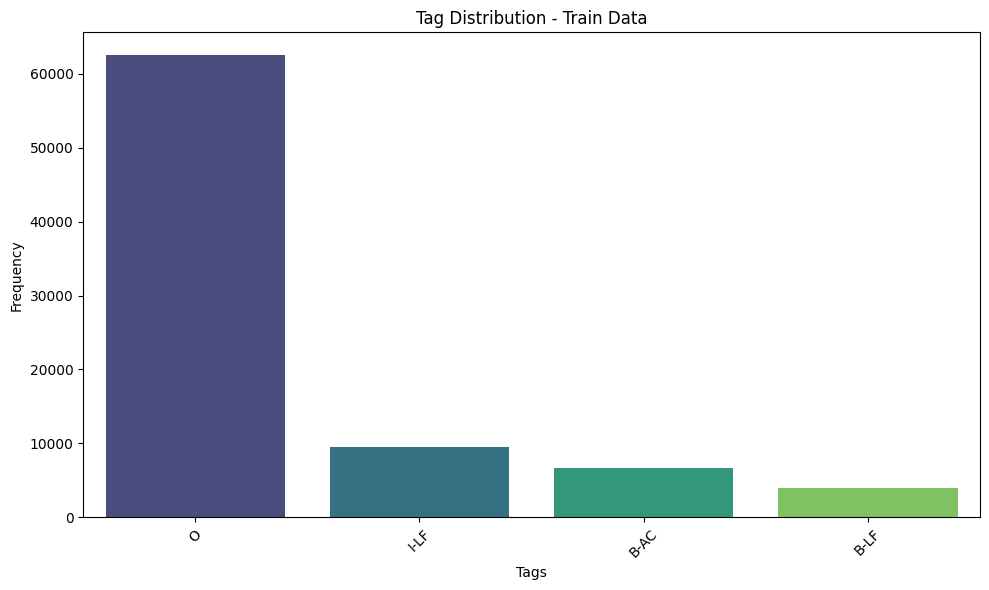

<ipython-input-54-19891834982a>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="viridis")


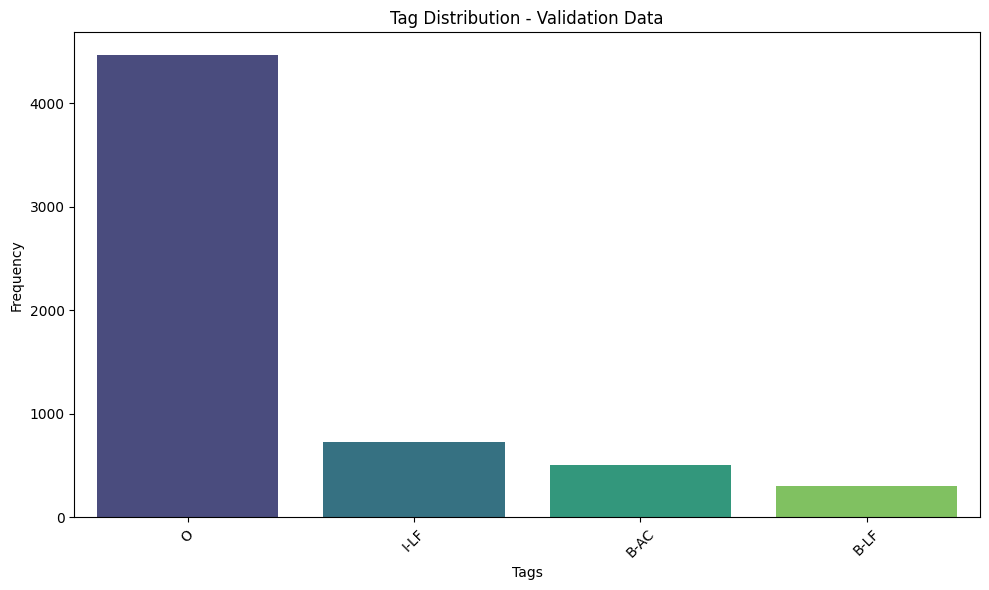

<ipython-input-54-19891834982a>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="viridis")


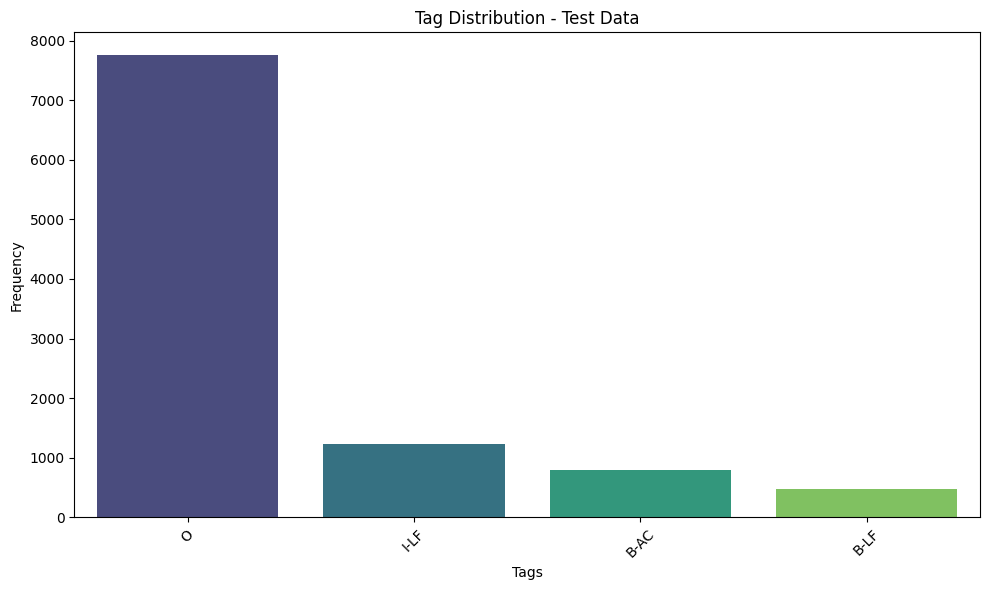

<ipython-input-54-19891834982a>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="viridis")


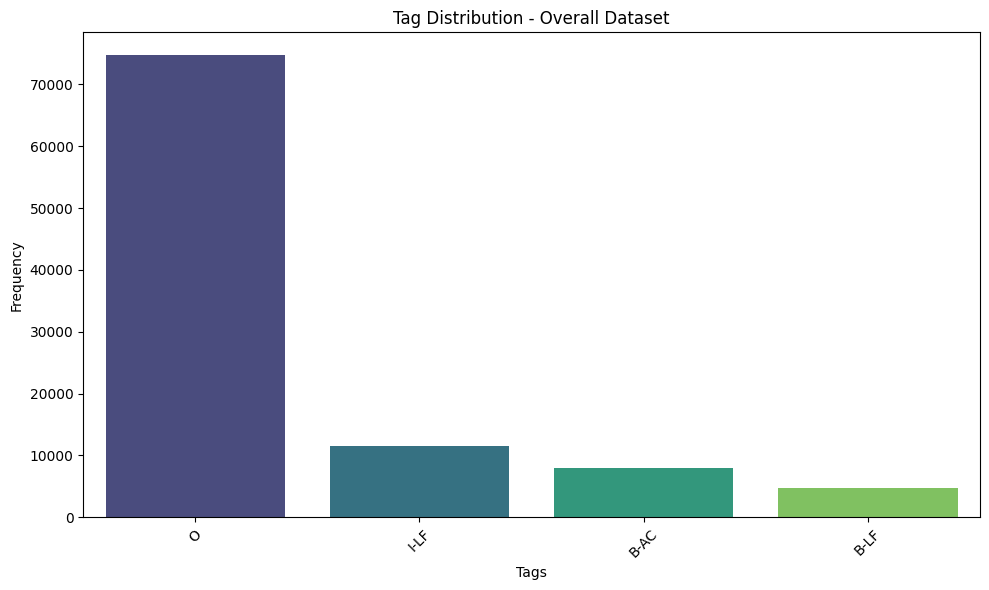

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import chain
from sklearn.preprocessing import LabelEncoder
from itertools import chain

# Combine all tags from train, validation, and test splits
all_tags = flat_train_tags + flat_val_tags + flat_test_tags

# Initialize and fit the LabelEncoder
tag_encoder = LabelEncoder()
tag_encoder.fit(all_tags)

# Now, transform and inverse-transform will work across all sets
y_train = tag_encoder.transform(flat_train_tags)
y_val = tag_encoder.transform(flat_val_tags)
y_test = tag_encoder.transform(flat_test_tags)

# Plot the distribution of tags in the dataset (train, validation, test)
def plot_tag_distribution(tags, title):
    # Count frequency of each tag
    tag_counts = pd.Series(tags).value_counts()

    # Plot using seaborn (barplot)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="viridis")
    plt.title(f"Tag Distribution - {title}")
    plt.xlabel("Tags")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot distributions for train, validation, and test sets
plot_tag_distribution(flat_train_tags, "Train Data")
plot_tag_distribution(flat_val_tags, "Validation Data")
plot_tag_distribution(flat_test_tags, "Test Data")

# Plot the overall distribution of tags in the entire dataset
plot_tag_distribution(all_tags, "Overall Dataset")

In [ ]:
print(dataset["train"].features["ner_tags"])


Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


#Named Entity Label Distribution Pie Chart

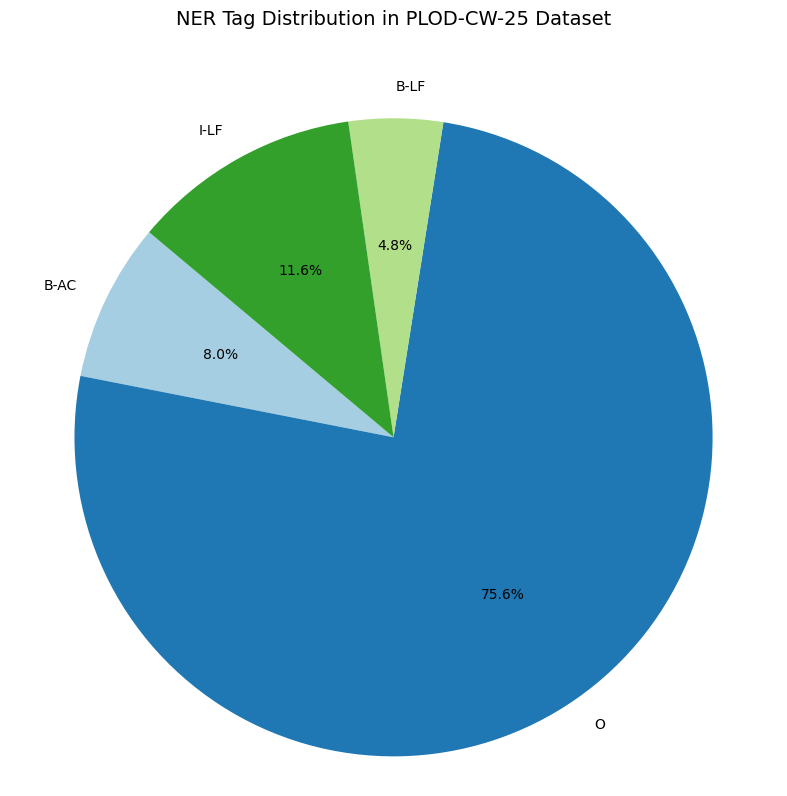

In [ ]:
tag_counts = Counter(all_tags)

labels = list(tag_counts.keys())
sizes = list(tag_counts.values())

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("NER Tag Distribution in PLOD-CW-25 Dataset", fontsize=14, y=1.08)  # more space
plt.axis("equal")
plt.tight_layout()
plt.show()

In [ ]:
def create_sample_weights(y_padded):
    return (y_padded != -1).astype("float32")

sample_weights_train = create_sample_weights(y_train)
sample_weights_val = create_sample_weights(y_val)

y_train = np.where(y_train == -1, 0, y_train)
y_val = np.where(y_val == -1, 0, y_val)



In [ ]:
#Training of model (using Adam as a baseline optimiser)

from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


history = model.fit(
    X_train, y_train[..., np.newaxis],
    validation_data=(X_val, y_val[..., np.newaxis], sample_weights_val),
    sample_weight=sample_weights_train,
    batch_size=32,
    epochs=15
)


Epoch 1/15
63/63 [==============================] - ETA: 0s - loss: 0.3968 - accuracy: 0.8909

63/63 [==============================] - 47s 569ms/step - loss: 0.3968 - accuracy: 0.8909 - val_loss: 0.2692 - val_accuracy: 0.8995
Epoch 2/15
63/63 [==============================] - ETA: 0s - loss: 0.2356 - accuracy: 0.9059

63/63 [==============================] - 35s 552ms/step - loss: 0.2356 - accuracy: 0.9059 - val_loss: 0.2337 - val_accuracy: 0.9197
Epoch 3/15
63/63 [==============================] - ETA: 0s - loss: 0.2191 - accuracy: 0.9116

63/63 [==============================] - 30s 483ms/step - loss: 0.2191 - accuracy: 0.9116 - val_loss: 0.2423 - val_accuracy: 0.9062
Epoch 4/15
63/63 [==============================] - ETA: 0s - loss: 0.2061 - accuracy: 0.9167

63/63 [==============================] - 32s 513ms/step - loss: 0.2061 - accuracy: 0.9167 - val_loss: 0.2165 - val_accuracy: 0.9222
Epoch 5/15
63/63 [==============================] - ETA: 0s - loss: 0.1938 - accuracy: 0.9249

63/63 [==============================] - 31s 497ms/step - loss: 0.1938 - accuracy: 0.9249 - val_loss: 0.2044 - val_accuracy: 0.9295
Epoch 6/15
63/63 [==============================] - ETA: 0s - loss: 0.1840 - accuracy: 0.9287

63/63 [==============================] - 31s 486ms/step - loss: 0.1840 - accuracy: 0.9287 - val_loss: 0.2105 - val_accuracy: 0.9203
Epoch 7/15
63/63 [==============================] - ETA: 0s - loss: 0.1738 - accuracy: 0.9341

63/63 [==============================] - 32s 509ms/step - loss: 0.1738 - accuracy: 0.9341 - val_loss: 0.2010 - val_accuracy: 0.9301
Epoch 8/15
63/63 [==============================] - ETA: 0s - loss: 0.1678 - accuracy: 0.9356

63/63 [==============================] - 31s 488ms/step - loss: 0.1678 - accuracy: 0.9356 - val_loss: 0.1877 - val_accuracy: 0.9381
Epoch 9/15
63/63 [==============================] - ETA: 0s - loss: 0.1623 - accuracy: 0.9368

63/63 [==============================] - 30s 484ms/step - loss: 0.1623 - accuracy: 0.9368 - val_loss: 0.1834 - val_accuracy: 0.9363
Epoch 10/15
63/63 [==============================] - ETA: 0s - loss: 0.1626 - accuracy: 0.9356

63/63 [==============================] - 32s 508ms/step - loss: 0.1626 - accuracy: 0.9356 - val_loss: 0.1828 - val_accuracy: 0.9418
Epoch 11/15
63/63 [==============================] - ETA: 0s - loss: 0.1525 - accuracy: 0.9382

63/63 [==============================] - 31s 486ms/step - loss: 0.1525 - accuracy: 0.9382 - val_loss: 0.1951 - val_accuracy: 0.9314
Epoch 12/15
63/63 [==============================] - ETA: 0s - loss: 0.1514 - accuracy: 0.9413

63/63 [==============================] - 31s 485ms/step - loss: 0.1514 - accuracy: 0.9413 - val_loss: 0.1809 - val_accuracy: 0.9363
Epoch 13/15
63/63 [==============================] - ETA: 0s - loss: 0.1469 - accuracy: 0.9419

63/63 [==============================] - 32s 515ms/step - loss: 0.1469 - accuracy: 0.9419 - val_loss: 0.1785 - val_accuracy: 0.9375
Epoch 14/15
63/63 [==============================] - ETA: 0s - loss: 0.1447 - accuracy: 0.9442

63/63 [==============================] - 31s 490ms/step - loss: 0.1447 - accuracy: 0.9442 - val_loss: 0.1788 - val_accuracy: 0.9387
Epoch 15/15
63/63 [==============================] - ETA: 0s - loss: 0.1403 - accuracy: 0.9438

63/63 [==============================] - 31s 498ms/step - loss: 0.1403 - accuracy: 0.9438 - val_loss: 0.1739 - val_accuracy: 0.9400


In [ ]:
from seqeval.metrics import classification_report, f1_score
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=-1)

idx2tag = {i: t for i, t in enumerate(tag_encoder.classes_)}

true_labels = [[idx2tag[idx] for idx in row if idx != -1] for row in y_test]
pred_labels = [[idx2tag[idx] for idx in row[:len(true_labels[i])]] for i, row in enumerate(y_pred_labels)]

print("F1 Score:", f1_score(true_labels, pred_labels))
report_dict = classification_report(true_labels, pred_labels,output_dict=True)
print(classification_report(true_labels, pred_labels))
#correlation matrix


8/8 [==============================] - 2s 257ms/step
F1 Score: 0.039829302987197716
              precision    recall  f1-score   support

          AC       0.58      0.04      0.07       741
          LF       0.00      0.00      0.00       455

   micro avg       0.13      0.02      0.04      1196
   macro avg       0.29      0.02      0.04      1196
weighted avg       0.36      0.02      0.04      1196



#Correlation Matrixes
there are 2 differnet matrixes, one compares metrics to each other and one comapres true/pred labels,


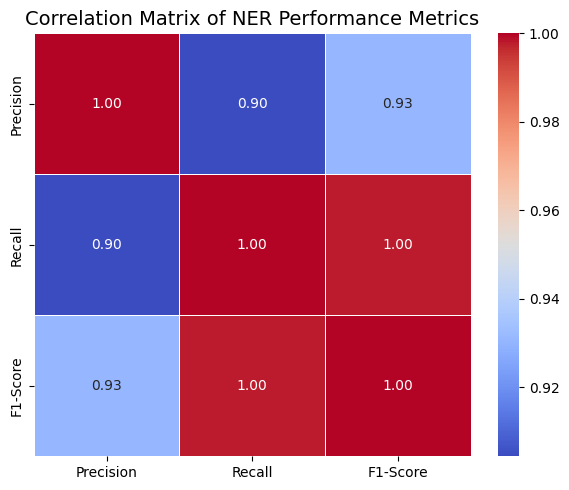

In [ ]:
# Step 2: Filter out summary rows like 'accuracy', 'macro avg', etc.
class_keys = [key for key in report_dict.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]

# Step 3: Build a DataFrame of metrics for each class
metrics_data = {
    cls: [
        report_dict[cls]['precision'],
        report_dict[cls]['recall'],
        report_dict[cls]['f1-score']
    ]
    for cls in class_keys
}

# Convert to DataFrame (rows = classes, columns = metrics)
metrics_df = pd.DataFrame.from_dict(metrics_data, orient='index', columns=['Precision', 'Recall', 'F1-Score'])

# Step 4: Correlation matrix (metrics-to-metrics)
correlation_matrix = metrics_df.corr()

# Step 5: Plot the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of NER Performance Metrics", fontsize=14)
plt.tight_layout()
plt.show()

Analysis:
Precision vs. Recall (0.9): A strong positive correlation —  model is doing well at both correctly identifying relevant tokens (precision) and covering all relevant tokens (recall).

F1 vs. Precision (0.93): Very high — as expected, since F1 is the harmonic mean of precision and recall. The closer F1 is to Precision, the more balanced the model is. model is likely favoring precision without sacrificing recall.

F1 vs. Recall (1): Extremely high — your model is generally balancing precision and recall well across tags. This indicates that the model is perfectly balanced in terms of recall, which is ideal in many cases, especially for NER tasks, where both recall and precision are crucial.

#Confusion Matrix

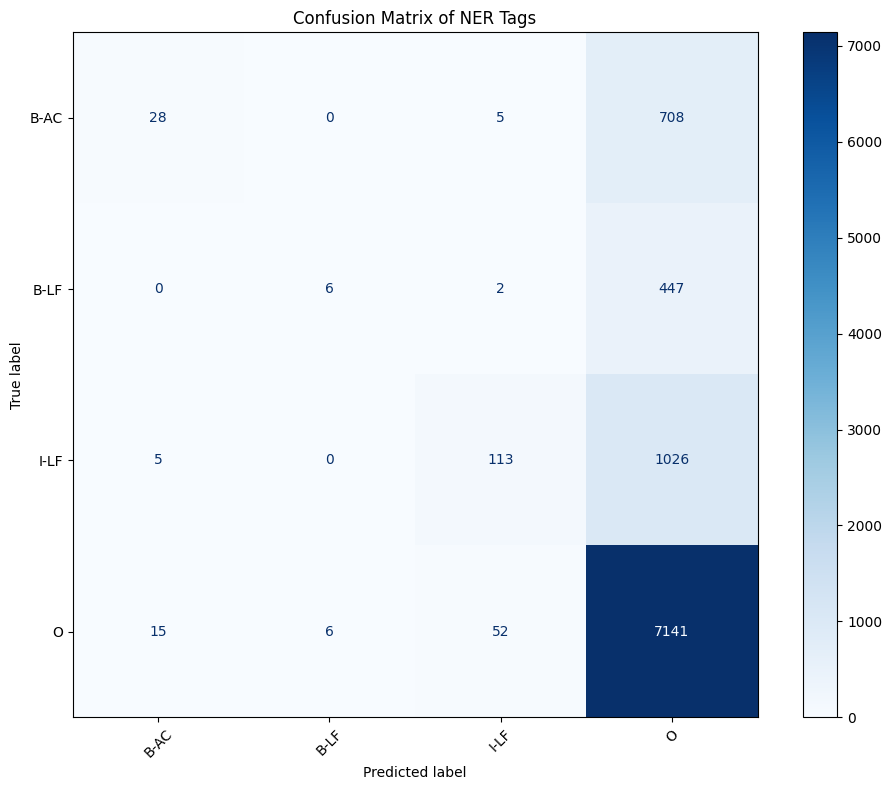

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Flatten true and predicted labels
flat_true = [tag for seq in true_labels for tag in seq]
flat_pred = [tag for seq in pred_labels for tag in seq]

# Make sure lengths match (remove excess pred labels)
flat_pred = flat_pred[:len(flat_true)]

# Get sorted list of all tags
unique_tags = sorted(set(flat_true + flat_pred))

# Encode strings as integers for sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(unique_tags)

y_true_encoded = le.transform(flat_true)
y_pred_encoded = le.transform(flat_pred)

# Build confusion matrix
cm = confusion_matrix(y_true_encoded, y_pred_encoded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix of NER Tags")
plt.tight_layout()
plt.show()

[[3.77867746e-02 0.00000000e+00 6.74763833e-03 9.55465587e-01]
 [0.00000000e+00 1.31868132e-02 4.39560440e-03 9.82417582e-01]
 [4.37062937e-03 0.00000000e+00 9.87762238e-02 8.96853147e-01]
 [2.07929027e-03 8.31716108e-04 7.20820627e-03 9.89880787e-01]]


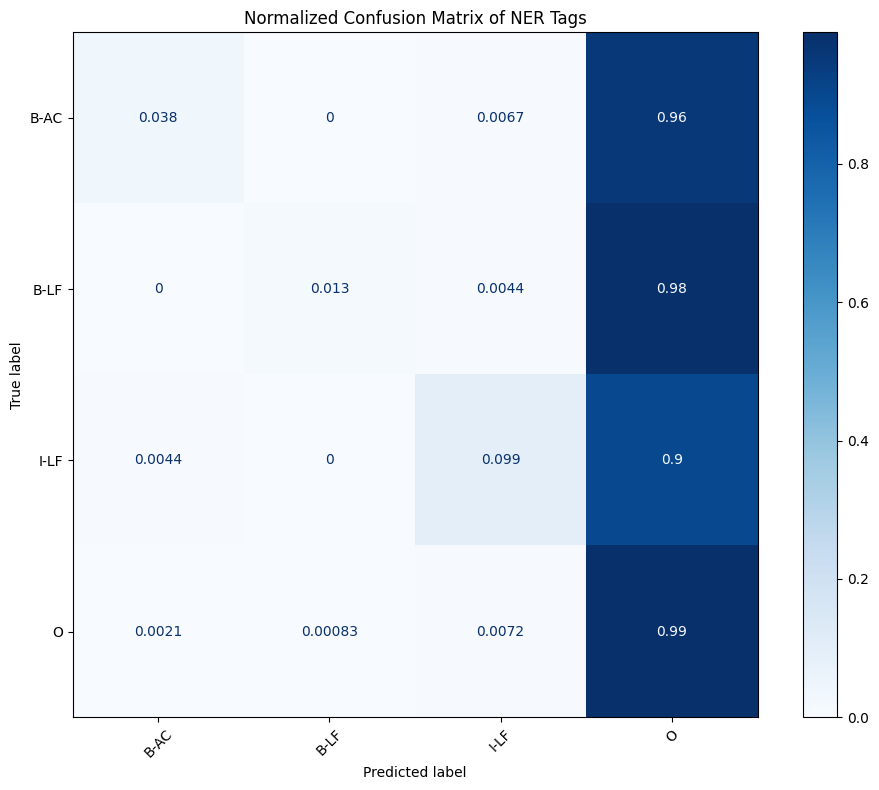

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_true_encoded, y_pred_encoded, normalize='true')  # normalize rows
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap="Blues", ax=ax, xticks_rotation=45)
plt.title("Normalized Confusion Matrix of NER Tags")
plt.tight_layout()
plt.show()

Analysis:
The model struggles with correctly predicting B-AC, B-LF, and I-LF entities. They are largely misclassified as O.

The model performs very well on predicting O-label samples, with almost all O-label samples being correctly predicted as O.

There is a substantial class imbalance problem, where the model might be heavily biased towards predicting O (non-entity), which could be a dominant class in the dataset.

There seems to be some degree of confusion between the B-AC, B-LF, and I-LF tags, which might be related to the features used for these tags or their inherent similarity in the context of the model.